In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn import metrics

In [2]:
ccfraud = pd.read_csv('data/creditcard.csv')

In [3]:
ccfraud.describe()
# get the average and count for each type
ccstats = ccfraud.groupby('Class')['Amount'].agg(['mean', 'count'])
# stats for fraud by count and average transaction amount
print(ccstats)

             mean   count
Class                    
0       88.291022  284315
1      122.211321     492


In [4]:
# percent of fraudulent transactions
print("Fraudulent transaction ratio:", ccstats.loc[1, 'count']/ccstats['count'].sum())

Fraudulent transaction ratio: 0.001727485630620034


In [5]:
np.random.seed(516)

In [6]:
train, test = train_test_split(ccfraud, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))
train_stats = train.groupby('Class')['Amount'].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('Class')['Amount'].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 213605
Rows in test: 71202
Training data:
              mean   count
Class                    
0       88.803152  213230
1      119.359653     375
Testing data:
              mean  count
Class                   
0       86.754814  71085
1      131.351282    117


In [7]:
# view all columns
print(list(ccfraud.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [8]:
# use column names 
pred_vars = ['Time', 'Amount', 'V8', 'V1']
print(ccfraud.loc[:, pred_vars])

            Time  Amount        V8         V1
0            0.0  149.62  0.098698  -1.359807
1            0.0    2.69  0.085102   1.191857
2            1.0  378.66  0.247676  -1.358354
3            1.0  123.50  0.377436  -0.966272
4            2.0   69.99 -0.270533  -1.158233
...          ...     ...       ...        ...
284802  172786.0    0.77  7.305334 -11.881118
284803  172787.0   24.79  0.294869  -0.732789
284804  172788.0   67.88  0.708417   1.919565
284805  172788.0   10.00  0.679145  -0.240440
284806  172792.0  217.00 -0.414650  -0.533413

[284807 rows x 4 columns]


In [9]:
dtree = tree.DecisionTreeClassifier(criterion="entropy")
dtree.fit(train.loc[:, pred_vars], train['Class'])

DecisionTreeClassifier(criterion='entropy')

In [10]:
print(dtree.get_n_leaves())
print(dtree.get_depth())

530
39


In [11]:
pred_labels = dtree.predict(test.loc[:, pred_vars])
pred_labels[0:4]

array([0, 0, 0, 0], dtype=int64)

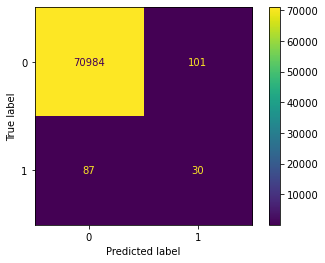

In [12]:
metrics.plot_confusion_matrix(dtree, test.loc[:, pred_vars], test['Class'])

In [13]:
print(metrics.classification_report(test['Class'], pred_labels, digits=5))

              precision    recall  f1-score   support

           0    0.99878   0.99858   0.99868     71085
           1    0.22901   0.25641   0.24194       117

    accuracy                        0.99736     71202
   macro avg    0.61389   0.62749   0.62031     71202
weighted avg    0.99751   0.99736   0.99743     71202



In [14]:
pred_probs = dtree.predict_proba(test.loc[:, pred_vars])
pred_probs[0:5, :]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [15]:
metrics.roc_auc_score(test['Class'], pred_probs[:,1])

0.6274947110988469

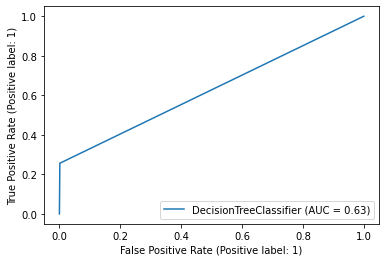

In [16]:
metrics.plot_roc_curve(dtree, test.loc[:, pred_vars], test['Class'])

In [17]:
metrics.average_precision_score(test['Class'], pred_probs[:,1])

0.05994178183815622

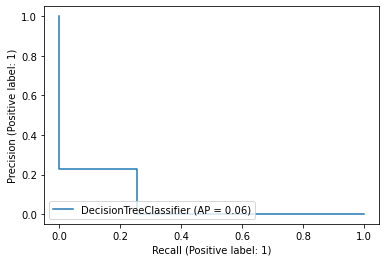

In [18]:
metrics.plot_precision_recall_curve(dtree, test.loc[:, pred_vars], test['Class'])

In [19]:
print(metrics.log_loss(test['Class'], pred_probs[:,1]))

0.0911964652900723


# Exercises


    1. What are the strengths and weaknesses of each evaluation criteria (precision/recall/F1/accuracy; model cost; log loss)?
    2. This model is severly over-fit. Try creating a new model and restricting the maximum depth of the tree to 5 
    levels (using the max_depth parameter). Run the various evaluation statistics on this new model.
        A. How does the tree compare to the original model?
        B. On which measures is it better/worse?
    3. Does adding additional variables to the model improve performance?
    4. This data is anonymized, which means the column names and their values have been obscured. What data columns do you think would be useful for detecting fraudulent credit card transactions?
    
## Optional Exercises


    1. What happens when you build the model using a different value for np.random.seed()?
    2. In this context, which evaluation statistic do you think is most relevant? Why?


# Task 1

precision: looks on how acurate predictions are

recall: Recall is how many positve cases are predicted

F1: F1 is the average of precision and recall 

accuracy: Shows how often overall predictions are correct

precision/recall/F1/accuracy: Combined give a great sense of over accuracy of the model, however they do not give a great sense if the model is unbalenced or not.

model cost: Strength that it allows you to see how much a model can cost. Weaknesses is that the most cost effective model may not be the most accurate model.

log loss: Strengths is with a lot of data points it is very good at showing how confident your model is. If there are not that many data points then the log loss output might be wildly innaccurate.

# Task 2

In [20]:
train, test = train_test_split(ccfraud, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))
train_stats = train.groupby('Class')['Amount'].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('Class')['Amount'].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 213605
Rows in test: 71202
Training data:
              mean   count
Class                    
0       88.392403  213235
1      110.663730     370
Testing data:
              mean  count
Class                   
0       87.986887  71080
1      157.232705    122


In [21]:
dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtree.fit(train.loc[:, pred_vars], train['Class'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
print(dtree.get_n_leaves())
print(dtree.get_depth())

27
5


In [23]:
pred_labels = dtree.predict(test.loc[:, pred_vars])
pred_labels[0:4]

array([0, 0, 0, 0], dtype=int64)

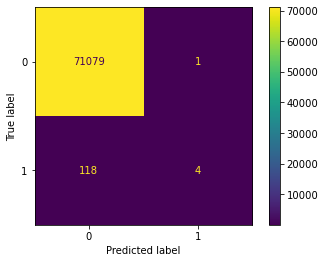

In [24]:
metrics.plot_confusion_matrix(dtree, test.loc[:, pred_vars], test['Class'])

In [25]:
print(metrics.classification_report(test['Class'], pred_labels, digits=5))

              precision    recall  f1-score   support

           0    0.99834   0.99999   0.99916     71080
           1    0.80000   0.03279   0.06299       122

    accuracy                        0.99833     71202
   macro avg    0.89917   0.51639   0.53108     71202
weighted avg    0.99800   0.99833   0.99756     71202



In [26]:
pred_probs = dtree.predict_proba(test.loc[:, pred_vars])
pred_probs[0:5, :]

array([[9.99211771e-01, 7.88229112e-04],
       [9.99743866e-01, 2.56134419e-04],
       [9.99743866e-01, 2.56134419e-04],
       [9.99743866e-01, 2.56134419e-04],
       [9.99211771e-01, 7.88229112e-04]])

In [27]:
metrics.roc_auc_score(test['Class'], pred_probs[:,1])

0.8428224489607646

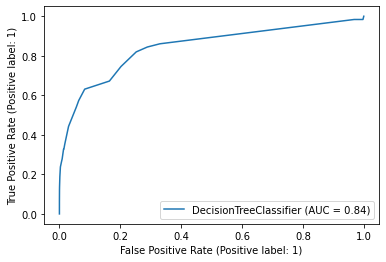

In [28]:
metrics.plot_roc_curve(dtree, test.loc[:, pred_vars], test['Class'])

In [29]:
metrics.average_precision_score(test['Class'], pred_probs[:,1])

0.10735219392713655

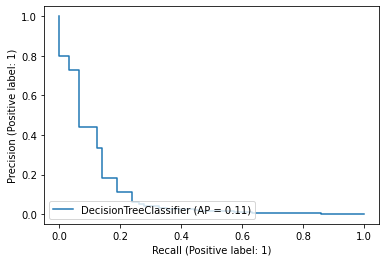

In [30]:
metrics.plot_precision_recall_curve(dtree, test.loc[:, pred_vars], test['Class'])

In [31]:
print(metrics.log_loss(test['Class'], pred_probs[:,1]))

0.01119874710376909


### Part A

This model is more accurate than the first, Though it is less useful because it is more unbalanced.

Recall: Original 0: 0.99858 1: 0.25641, 5 levels model: 0: 0.99999 1: 0.06299

Accuracy f-score: Original 0.99736, 5 levels model 0.99833

Macro Accuracy f-score: Original 0.62031, 5 levels model 0.53108 (Accuracy went up but Macro accuracy went down for failed prediction of credit card fraud.)

roc_auc_score: Original 0.62749, 5 levels model 0.84282

average_precision_score: Original 0.05994, 5 levels model 0.10735

log_loss: Original 0.09119, 5 levels model 0.01119

### Part B

The metrics that are better are classifying not fraud as not fraud as well as the number of not fraud that got classified as fraud, there was only 1. What performs worse was that we only predicted 4 out of 122 cases of fraud. Although this model is more accurate we do a horrible job of predicting fraud making the model one sided and pretty much useless practically.

# Task 3

In [35]:
train, test = train_test_split(ccfraud, test_size=0.25)
print("Rows in train:", len(train))
print("Rows in test:", len(test))
train_stats = train.groupby('Class')['Amount'].agg(['mean', 'count'])
print("Training data:\n", train_stats)
test_stats = test.groupby('Class')['Amount'].agg(['mean', 'count'])
print("Testing data:\n", test_stats)

Rows in train: 213605
Rows in test: 71202
Training data:
              mean   count
Class                    
0       88.822678  213226
1      124.160554     379
Testing data:
              mean  count
Class                   
0       86.696362  71089
1      115.673628    113


In [36]:
print(list(ccfraud.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [37]:
pred_vars_new = ['Time', 'Amount', 'V8', 'V1','V5','V25','V17']
print(ccfraud.loc[:, pred_vars_new])

            Time  Amount        V8         V1        V5       V25       V17
0            0.0  149.62  0.098698  -1.359807 -0.338321  0.128539  0.207971
1            0.0    2.69  0.085102   1.191857  0.060018  0.167170 -0.114805
2            1.0  378.66  0.247676  -1.358354 -0.503198 -0.327642  1.109969
3            1.0  123.50  0.377436  -0.966272 -0.010309  0.647376 -0.684093
4            2.0   69.99 -0.270533  -1.158233 -0.407193 -0.206010 -0.237033
...          ...     ...       ...        ...       ...       ...       ...
284802  172786.0    0.77  7.305334 -11.881118 -5.364473  1.436807  1.991691
284803  172787.0   24.79  0.294869  -0.732789  0.868229 -0.606624 -0.025693
284804  172788.0   67.88  0.708417   1.919565  2.630515  0.265745  0.313502
284805  172788.0   10.00  0.679145  -0.240440 -0.377961 -0.569159  0.509928
284806  172792.0  217.00 -0.414650  -0.533413 -0.012546 -0.473649 -0.660377

[284807 rows x 7 columns]


In [38]:
dtree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtree.fit(train.loc[:, pred_vars_new], train['Class'])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
pred_labels_new = dtree.predict(test.loc[:, pred_vars_new])
pred_labels_new[0:4]

array([0, 0, 0, 0], dtype=int64)

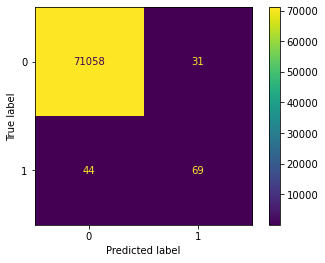

In [41]:
metrics.plot_confusion_matrix(dtree, test.loc[:, pred_vars_new], test['Class'])

In [43]:
print(metrics.classification_report(test['Class'], pred_labels_new, digits=5))

              precision    recall  f1-score   support

           0    0.99938   0.99956   0.99947     71089
           1    0.69000   0.61062   0.64789       113

    accuracy                        0.99895     71202
   macro avg    0.84469   0.80509   0.82368     71202
weighted avg    0.99889   0.99895   0.99891     71202



In [44]:
pred_probs_new = dtree.predict_proba(test.loc[:, pred_vars_new])
pred_probs_new[0:5, :]

array([[9.99825391e-01, 1.74608631e-04],
       [9.99825391e-01, 1.74608631e-04],
       [9.99825391e-01, 1.74608631e-04],
       [9.99825391e-01, 1.74608631e-04],
       [9.99825391e-01, 1.74608631e-04]])

In [45]:
metrics.roc_auc_score(test['Class'], pred_probs_new[:,1])

0.8754578113911056

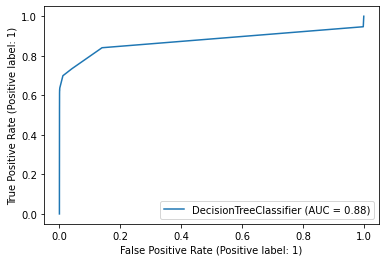

In [46]:
metrics.plot_roc_curve(dtree, test.loc[:, pred_vars_new], test['Class'])

In [47]:
metrics.average_precision_score(test['Class'], pred_probs_new[:,1])

0.490828774267351

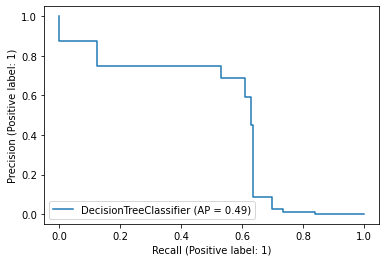

In [49]:
metrics.plot_precision_recall_curve(dtree, test.loc[:, pred_vars_new], test['Class'])

Adding more variable did improve the accuracy of the model with an average percision score of 49%. We also more accuratly predicted fraud at 56.56% compared to the previous models it is a big improvment and balances the model a little more. There is definitely still room for improvemnet though.

# Task 4

4. This data is anonymized, which means the column names and their values have been obscured. What data columns do you think would be useful for detecting fraudulent credit card transactions?

Data columns that would be useful in predicting credit card fraud would be number of transaction for 30, 60, and 90 days. This could let us see the frequency someone uses their card. Another column that would be useful is transaction location. Transaction type would also be useful is transaction type to see if there is unusual transaction type.